In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, leaves_list

In [23]:
ctl_s1 = pd.ExcelFile('./genecards_comparisons/ctl_s1_gc.xlsx')
s1_s2 = pd.ExcelFile('./genecards_comparisons/s1_s2_gc.xlsx')
s2_s3 = pd.ExcelFile('./genecards_comparisons/s2_s3_gc.xlsx')
s3_s4 = pd.ExcelFile('./genecards_comparisons/s3_s4_gc.xlsx')

In [24]:
ctl_s1_pathways = pd.read_excel(ctl_s1, 'Pathways', skiprows=18)
s1_s2_pathways = pd.read_excel(s1_s2, 'Pathways', skiprows=18)
s2_s3_pathways = pd.read_excel(s2_s3, 'Pathways', skiprows=18)
s3_s4_pathways = pd.read_excel(s3_s4, 'Pathways', skiprows=18)

# print(ctl_s1_pathways.columns)
print(ctl_s1_pathways.shape)
print(s1_s2_pathways.shape)
print(s2_s3_pathways.shape)
print(s3_s4_pathways.shape)

(103, 6)
(20, 6)
(78, 6)
(116, 6)


Highly Significant Pathways

In [25]:

# # filter ctl_s1_pathways to keep only pathways with SuperPath Score >= 13.60
# ctl_s1_pathways = ctl_s1_pathways[ctl_s1_pathways['Score'] >= 13.60]
# print(ctl_s1_pathways.shape)

# # filter s1_s2_pathways to keep only pathways with SuperPath Score >= 16.95
# s1_s2_pathways = s1_s2_pathways[s1_s2_pathways['Score'] >= 16.95]
# print(s1_s2_pathways.shape)

# # filter s2_s3_pathways to keep only pathways with SUperPath Score >= 13.29
# s2_s3_pathways = s2_s3_pathways[s2_s3_pathways['Score'] >= 13.29]
# print(s2_s3_pathways.shape)

# # filter s3_s4_pathways to keep only pathways with SuperPath Score >= 13.29
# s3_s4_pathways = s3_s4_pathways[s3_s4_pathways['Score'] >= 13.29]
# print(s3_s4_pathways.shape)

Significant Pathways with p-value < 0.05
- No filtering is required as only significant pathways are in the data

In [26]:
# Create union of all unique pathways
pathways = pd.concat([ctl_s1_pathways, s1_s2_pathways, s2_s3_pathways, s3_s4_pathways])
pathways = pathways.drop_duplicates(subset='SuperPath Name')

In [27]:
# Create binary matrix table of what pathways are present in each comparison
pathway_matrix = pd.DataFrame(index=pathways['SuperPath Name'])
pathway_matrix['ctl_s1'] = 0
pathway_matrix['s1_s2'] = 0
pathway_matrix['s2_s3'] = 0
pathway_matrix['s3_s4'] = 0

for index, row in pathways.iterrows():
    pathway = row['SuperPath Name']
    if pathway in ctl_s1_pathways['SuperPath Name'].values:
        pathway_matrix.at[pathway, 'ctl_s1'] = 1
    if pathway in s1_s2_pathways['SuperPath Name'].values:
        pathway_matrix.at[pathway, 's1_s2'] = 1
    if pathway in s2_s3_pathways['SuperPath Name'].values:
        pathway_matrix.at[pathway, 's2_s3'] = 1
    if pathway in s3_s4_pathways['SuperPath Name'].values:
        pathway_matrix.at[pathway, 's3_s4'] = 1

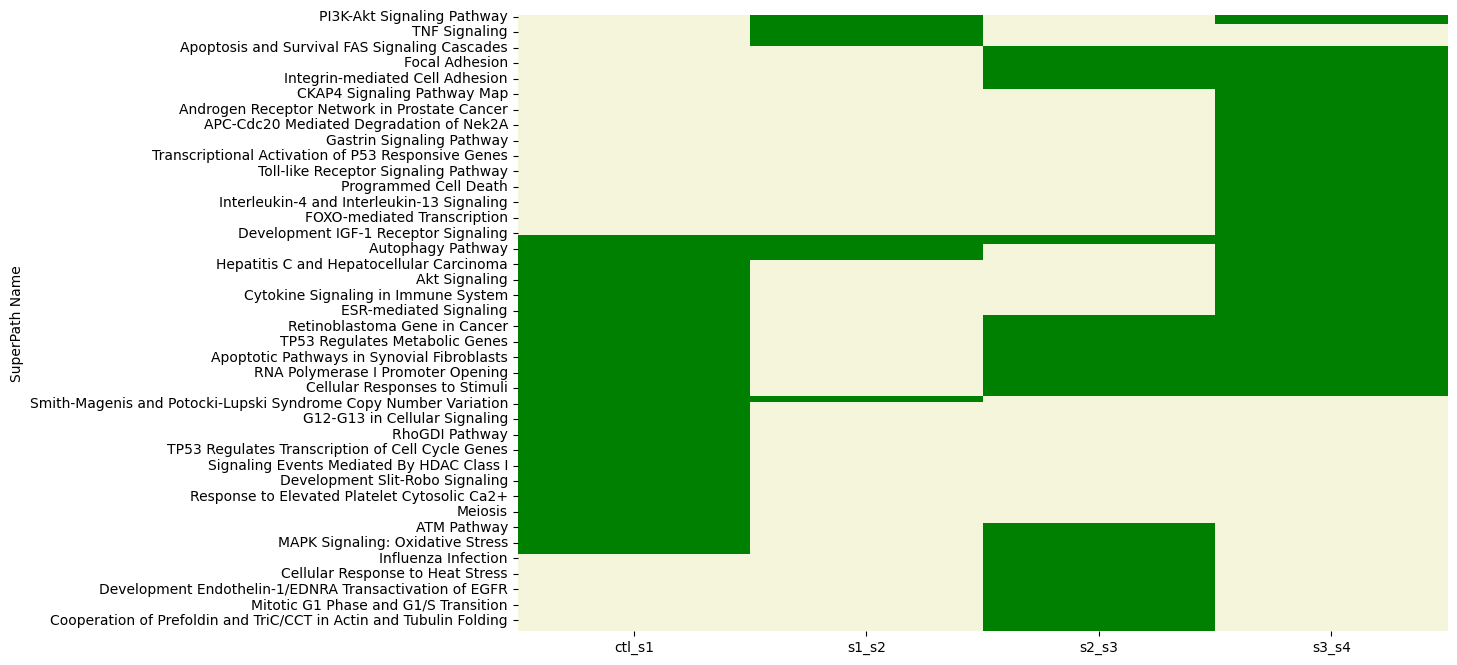

In [28]:
# Clustering
linkage_matrix = linkage(pathway_matrix, method='average', metric='euclidean')

# Extract the order of pathways after clustering
ordered_index = leaves_list(linkage_matrix)
ordered_pathway_matrix = pathway_matrix.iloc[ordered_index]

# Save the ordered matrix to Excel
ordered_pathway_matrix.to_excel('./genecards_comparisons/pathway_matrix_clustered.xlsx')

# Optional: Plot heatmap with the new order
plt.figure(figsize=(12, 8))
sns.heatmap(ordered_pathway_matrix, cmap=['beige', 'green'], cbar=False)
plt.show()